<a href="https://colab.research.google.com/github/kristacourtaway/News-Authenticator/blob/main/News%20Authenticator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Libraries and Data

In [30]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import PassiveAggressiveClassifier
import pickle
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv('/content/Fake_News_Detection.csv')

In [10]:
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


## Label Distribution

In [11]:
df['label'].value_counts()

REAL    3171
FAKE    3164
Name: label, dtype: int64

In [12]:
def create_distribution(datafile):
    return sns.countplot(x='label', data = datafile)

<Axes: xlabel='label', ylabel='count'>

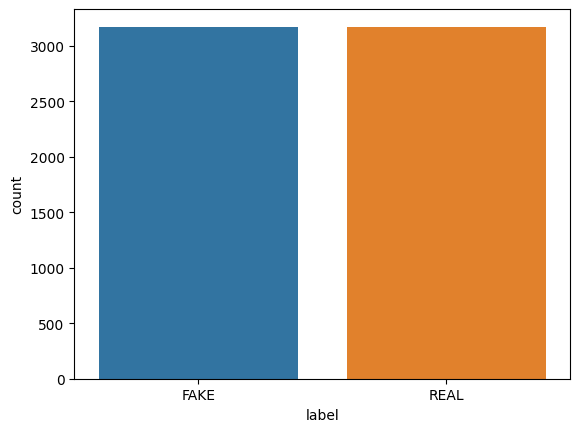

In [13]:
create_distribution(df)

## Data Integrity Check

In [14]:
def data_integrity():
    print('Checking Data Qualities')
    df.isnull().sum()
    df.info()
    print('Check Finished')

In [15]:
data_integrity()

Checking Data Qualities
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB
Check Finished


## Train Test Split

In [16]:
x = df['text']
y = df['label']

In [17]:
y.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.33, random_state=42)

## Apply NLP Techniques

In [19]:
x_train.head()

5593    The next president is most likely to face an i...
6067    Following news of FBI Director James Comey’s d...
3026    Interviews A protester throws a glass bottle c...
4385    Will it be representative government or thugoc...
120     It is increasingly apparent that the U.S. war ...
Name: text, dtype: object

In [20]:
countVectorizer = CountVectorizer(stop_words='english')

In [21]:
countTrain = countVectorizer.fit_transform(x_train)

In [22]:
countTrain.shape

(4244, 56801)

In [23]:
df.shape

(6335, 4)

In [24]:
x_train.shape

(4244,)

In [25]:
countVectorizer.vocabulary_

{'president': 39371,
 'likely': 29886,
 'face': 18756,
 'international': 26482,
 'crisis': 12723,
 'shortly': 45820,
 'taking': 49614,
 'office': 35654,
 'donald': 15846,
 'trump': 51775,
 'hillary': 23990,
 'clinton': 10533,
 'credibility': 12626,
 'problem': 39599,
 'foreign': 20249,
 'affairs': 2625,
 'defense': 13885,
 'secretary': 44932,
 'robert': 43222,
 'gates': 21231,
 'said': 43952,
 'friday': 20679,
 'senior': 45133,
 'advocate': 2586,
 'using': 53360,
 'military': 32568,
 'bring': 7873,
 'ill': 25140,
 'fated': 19085,
 'regime': 41815,
 'change': 9632,
 'libya': 29780,
 'failed': 18842,
 'anticipate': 3825,
 'chaos': 9656,
 'follow': 20132,
 'served': 45257,
 'presidents': 39376,
 '50': 1205,
 'years': 55979,
 'wrote': 55770,
 'op': 35889,
 'ed': 16693,
 'wall': 54471,
 'street': 48391,
 'journal': 27613,
 'failure': 18846,
 'democrats': 14147,
 'hung': 24766,
 'neck': 34359,
 'bush': 8365,
 '43': 1103,
 'administration': 2451,
 'post': 38957,
 'saddam': 43880,
 'iraq': 267

# Create a word cloud

In [45]:
print(list(vocab.keys())[:10])  # Print first 10 keys to check


['daniel', 'greenfield', 'shillman', 'journalism', 'fellow', 'at', 'the', 'freedom', 'center', 'is']


In [46]:
texts = df['text'].dropna()

In [47]:
vectorizer = CountVectorizer()

# Fit and transform the data to generate a term-document matrix

In [48]:
X = vectorizer.fit_transform(texts)

In [49]:
word_freq = np.sum(X.toarray(), axis=0)

In [50]:
vocab_freq = {word: freq for word, freq in zip(vectorizer.get_feature_names_out(), word_freq)}

In [51]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(vocab_freq)

In [52]:
# Assume vocab_freq is your vocabulary frequency dictionary
# Remove a specific word (e.g., 'remove_this_word')
if 'trump' in vocab_freq:
    removed_word_freq = vocab_freq.pop('trump')

In [53]:
# Add a new word (e.g., 'new_word') with the frequency of the removed word
vocab_freq['authenticator'] = removed_word_freq

In [54]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(vocab_freq)


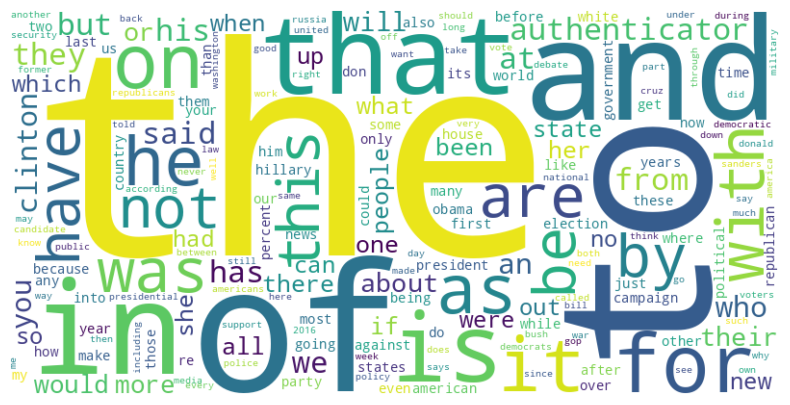

In [55]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [ ]:
countTest = countVectorizer.fit_transform(x_test)

In [ ]:
countTest.shape

(2091, 42708)

In [ ]:
tfIDF = TfidfVectorizer(stop_words = 'english', max_df=0.7)

In [ ]:
tfIDFtrain = tfIDF.fit_transform(x_train)

In [ ]:
tfIDFtrain.shape

(4244, 56801)

In [ ]:
tfIDFtrain.A[0:10]

array([[0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       ...,
       [0.0575239, 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ]])

In [ ]:
tfIDFtest = tfIDF.fit_transform(x_test)

## ML Pipeline

In [ ]:
nbPipeline = Pipeline([
    ('tf_idf', tfIDF),
    ('nb_clf', MultinomialNB())
])

In [ ]:
nbPipeline.fit(x_train, y_train)

Pipeline(steps=[('tf_idf', TfidfVectorizer(max_df=0.7, stop_words='english')),
                ('nb_clf', MultinomialNB())])

In [ ]:
predictedNB = nbPipeline.predict(x_test)

In [ ]:
predictedNB


array(['FAKE', 'FAKE', 'FAKE', ..., 'REAL', 'FAKE', 'FAKE'], dtype='<U4')

In [ ]:
confusion_matrix(predictedNB, y_test)

array([[ 704,   19],
       [ 367, 1001]])

In [ ]:
accuracy_score(predictedNB, y_test)

0.8153993304638929

In [ ]:
nbcPipeline = Pipeline([
    ('NBCV', countVectorizer),
    ('nb_clf', MultinomialNB())
])

In [ ]:
nbcPipeline.fit(x_train, y_train)

Pipeline(steps=[('NBCV', CountVectorizer(stop_words='english')),
                ('nb_clf', MultinomialNB())])

In [ ]:
predictedNBC = nbcPipeline.predict(x_test)

In [ ]:
confusion_matrix(predictedNBC, y_test)

array([[913,  75],
       [158, 945]])

In [ ]:
accuracy_score(predictedNBC, y_test)

0.8885700621712099

## TF-IDF and Passive Aggressive Classifier

In [ ]:
linearCLF = Pipeline(
    [('linear', tfIDF),
    ('pa_clf', PassiveAggressiveClassifier())]
)

In [ ]:
linearCLF.fit(x_train, y_train)

Pipeline(steps=[('linear', TfidfVectorizer(max_df=0.7, stop_words='english')),
                ('pa_clf', PassiveAggressiveClassifier())])

In [ ]:
pred = linearCLF.predict(x_test)

In [ ]:
pred

array(['FAKE', 'FAKE', 'FAKE', ..., 'REAL', 'FAKE', 'FAKE'], dtype='<U4')

In [ ]:
accuracy_score(y_test,pred)

0.9421329507412721

In [ ]:
linearCLF = Pipeline(
    [('linear', tfIDF),
    ('pa_clf', PassiveAggressiveClassifier())]
)

In [ ]:
file = open(r'/content/final_model.pkl','wb')

In [ ]:
pickle.dump(linearCLF, file)